### NLP Assignment 2
#### January 2020

###### Name: 
###### Index No.: 

### Answer (a)

This sention will load the dataset, remove symbols and filter alphanumeric words, tokenize, identify singlish or not and finally create 2 different CSV files for each

In [635]:
import pandas as pd

In [636]:
#importing the dataset
df = pd.read_csv("./Sinhala_Singlish_Hate_Speech.csv/Sinhala_Singlish_Hate_Speech.csv")
df.head()

,PhraseNo,Phrase,IsHateSpeech
0,1,මේ බැල්ලි කොටින්ගේ ගු කනකොට අපහසුවක් දැනුනෙ නැ...,YES
1,2,මන් ඊයේ මුස්ලිම් ඩෑල් එකක් එක්ක සෙල්ෆියක් ගත්ත...,YES
2,3,සංහිදියාවට අවුලක් වෙයි ද,NO
3,4,.කටින් පුරසාරම් දොඩන අපි සිංහලයො විදියට ලැජ්ජා...,YES
4,5,මචන් ඔය මගුල නවත්තලා කොන්දක් තියෙනවානම් පුලුවන...,YES


In [637]:
#function to remove non-alphanumeric characters
symbols = ["~", "`", "!", "@", "#", "$", "%", "^", "&", "*", "(", ")", "_", "-", "+", "=", ";", ":", '\"', "\'", "<", ",", ">", ".", "?", "/", "{", "[", "}", "]", "|", "\\"]
def removeNonAlphaNumeric(string):
    formattedStr = string
    for symbol in symbols:
        formattedStr = formattedStr.replace(symbol, ' ')
    return formattedStr        

In [638]:
df["cleaned_phrase"] = df.Phrase.apply(removeNonAlphaNumeric)

### Note: Did not filtered html tags since they were not present in the dataset. Only the symbols were removed

In [639]:
# function to tokenize a string using spaces since symbols are removed
def tokenize(string):
    tokens = string.split(" ")
    finalizedTokens = []
    for t in tokens:
        if(len(t) != 0):
            finalizedTokens.append(t)
    return finalizedTokens

In [640]:
tokens = []

In [641]:
# generate tokens
for index, row in df.iterrows():
    tokens.append(tokenize(row['cleaned_phrase']))

In [642]:
tokens

[['මේ',
  'බැල්ලි',
  'කොටින්ගේ',
  'ගු',
  'කනකොට',
  'අපහසුවක්',
  'දැනුනෙ',
  'නැද්ද',
  'දන්',
  'නැහැ',
  'ඔකිට',
  'මිනිහා',
  'මැරුනම',
  'දැනුන',
  'දුකට',
  'වඩා',
  'දහස්',
  'ගුනයක',
  'දුකක්',
  'දැනෙනවා',
  'ඉස්සරහට',
  'උපසම්පදාව',
  'තියන',
  'භික්සුවක්',
  'හිරේ',
  'යැවුවට',
  'ඔකි',
  'වැඩියෙන්ම',
  'ආදරේ',
  'කෙනෙක්',
  'ඔකිට',
  'නැති',
  'වෙනවා',
  'වැඩි',
  'කල්',
  'නොගිහින්'],
 ['මන්',
  'ඊයේ',
  'මුස්ලිම්',
  'ඩෑල්',
  'එකක්',
  'එක්ක',
  'සෙල්ෆියක්',
  'ගත්තා',
  'සහජීවනේ',
  'රැකගෙන',
  'ඉදිරියට',
  'යන්න',
  'ඌ',
  'ඒක',
  'තාම',
  'දාලා',
  'නෑ',
  'පරයා'],
 ['සංහිදියාවට', 'අවුලක්', 'වෙයි', 'ද'],
 ['කටින්',
  'පුරසාරම්',
  'දොඩන',
  'අපි',
  'සිංහලයො',
  'විදියට',
  'ලැජ්ජා',
  'විය',
  'යුතුයි'],
 ['මචන්',
  'ඔය',
  'මගුල',
  'නවත්තලා',
  'කොන්දක්',
  'තියෙනවානම්',
  'පුලුවන්නම්',
  'කරලා',
  'පෙන්නපන්',
  'ඔය',
  'දෙසපාලනය',
  'කරන',
  'අයගෙන්',
  'මෙ',
  'රටට',
  'මොකක්ද',
  'වෙලාතියෙන්නෙ',
  'කියලා',
  'අන්න',
  'එදාට',
  'උබ',
  'නියම',
  'කොල්ලෙක්',
 

In [643]:
# function to identify a given string is english or not
def isEnglish(s):
    if(str.isdigit(s)):
        return False
    try:
        s.encode(encoding='utf-8').decode('ascii')
    except UnicodeDecodeError:
        return False
    else:
        return True

In [644]:
# function to identify a given list of tokens are singlish or  not
def isSinglish(tokens):
    for token in tokens:
        if(isEnglish(token)):
            return True
    return False
        

In [646]:
# function to get the unique token of a given singlish token
def getUniqueSinglishTokens(token):
    convertedToken = token.lower()
    # get the root version
    return convertedToken

In [649]:
cleaned_tokens = []
for sentTokens in tokens:
    if(isSinglish(sentTokens)):
        temp = []
        for token in sentTokens:
            if(isEnglish(token)):
                temp.append(getUniqueSinglishTokens(token))
            else:
                temp.append(token)
        cleaned_tokens.append(temp)
    else:
        cleaned_tokens.append(sentTokens)
        

In [650]:
cleaned_tokens

[['මේ',
  'බැල්ලි',
  'කොටින්ගේ',
  'ගු',
  'කනකොට',
  'අපහසුවක්',
  'දැනුනෙ',
  'නැද්ද',
  'දන්',
  'නැහැ',
  'ඔකිට',
  'මිනිහා',
  'මැරුනම',
  'දැනුන',
  'දුකට',
  'වඩා',
  'දහස්',
  'ගුනයක',
  'දුකක්',
  'දැනෙනවා',
  'ඉස්සරහට',
  'උපසම්පදාව',
  'තියන',
  'භික්සුවක්',
  'හිරේ',
  'යැවුවට',
  'ඔකි',
  'වැඩියෙන්ම',
  'ආදරේ',
  'කෙනෙක්',
  'ඔකිට',
  'නැති',
  'වෙනවා',
  'වැඩි',
  'කල්',
  'නොගිහින්'],
 ['මන්',
  'ඊයේ',
  'මුස්ලිම්',
  'ඩෑල්',
  'එකක්',
  'එක්ක',
  'සෙල්ෆියක්',
  'ගත්තා',
  'සහජීවනේ',
  'රැකගෙන',
  'ඉදිරියට',
  'යන්න',
  'ඌ',
  'ඒක',
  'තාම',
  'දාලා',
  'නෑ',
  'පරයා'],
 ['සංහිදියාවට', 'අවුලක්', 'වෙයි', 'ද'],
 ['කටින්',
  'පුරසාරම්',
  'දොඩන',
  'අපි',
  'සිංහලයො',
  'විදියට',
  'ලැජ්ජා',
  'විය',
  'යුතුයි'],
 ['මචන්',
  'ඔය',
  'මගුල',
  'නවත්තලා',
  'කොන්දක්',
  'තියෙනවානම්',
  'පුලුවන්නම්',
  'කරලා',
  'පෙන්නපන්',
  'ඔය',
  'දෙසපාලනය',
  'කරන',
  'අයගෙන්',
  'මෙ',
  'රටට',
  'මොකක්ද',
  'වෙලාතියෙන්නෙ',
  'කියලා',
  'අන්න',
  'එදාට',
  'උබ',
  'නියම',
  'කොල්ලෙක්',
 

In [651]:
sinhala_tokens_set = []
singlish_tokens_set = []

In [652]:
for tokenSet in cleaned_tokens:
    if(isSinglish(tokenSet)):
        singlish_tokens_set.append(tokenSet)
    else:
        sinhala_tokens_set.append(tokenSet)

In [653]:
sinhala_tokens_set

[['මේ',
  'බැල්ලි',
  'කොටින්ගේ',
  'ගු',
  'කනකොට',
  'අපහසුවක්',
  'දැනුනෙ',
  'නැද්ද',
  'දන්',
  'නැහැ',
  'ඔකිට',
  'මිනිහා',
  'මැරුනම',
  'දැනුන',
  'දුකට',
  'වඩා',
  'දහස්',
  'ගුනයක',
  'දුකක්',
  'දැනෙනවා',
  'ඉස්සරහට',
  'උපසම්පදාව',
  'තියන',
  'භික්සුවක්',
  'හිරේ',
  'යැවුවට',
  'ඔකි',
  'වැඩියෙන්ම',
  'ආදරේ',
  'කෙනෙක්',
  'ඔකිට',
  'නැති',
  'වෙනවා',
  'වැඩි',
  'කල්',
  'නොගිහින්'],
 ['මන්',
  'ඊයේ',
  'මුස්ලිම්',
  'ඩෑල්',
  'එකක්',
  'එක්ක',
  'සෙල්ෆියක්',
  'ගත්තා',
  'සහජීවනේ',
  'රැකගෙන',
  'ඉදිරියට',
  'යන්න',
  'ඌ',
  'ඒක',
  'තාම',
  'දාලා',
  'නෑ',
  'පරයා'],
 ['සංහිදියාවට', 'අවුලක්', 'වෙයි', 'ද'],
 ['කටින්',
  'පුරසාරම්',
  'දොඩන',
  'අපි',
  'සිංහලයො',
  'විදියට',
  'ලැජ්ජා',
  'විය',
  'යුතුයි'],
 ['මචන්',
  'ඔය',
  'මගුල',
  'නවත්තලා',
  'කොන්දක්',
  'තියෙනවානම්',
  'පුලුවන්නම්',
  'කරලා',
  'පෙන්නපන්',
  'ඔය',
  'දෙසපාලනය',
  'කරන',
  'අයගෙන්',
  'මෙ',
  'රටට',
  'මොකක්ද',
  'වෙලාතියෙන්නෙ',
  'කියලා',
  'අන්න',
  'එදාට',
  'උබ',
  'නියම',
  'කොල්ලෙක්',
 

In [654]:
singlish_tokens_set

[['menna',
  'ratawal',
  'menna',
  'minissu',
  'ape',
  'ratawal',
  'wala',
  'inna',
  'jathin',
  'thunema',
  'gothrikayo',
  'tika',
  'manussayo',
  'karala',
  'inna',
  'wenawa'],
 ['paduway',
  'hitahan',
  'beri',
  'weda',
  'nokaran',
  'bat',
  'eka',
  'gaththada',
  'bole',
  'elluwada',
  'oka',
  'karagena',
  'inna',
  'oyala',
  'desapalanayata',
  'atha',
  'daruwan',
  'therum',
  'ganna',
  'nikan',
  'thiyena',
  'prrsiddath',
  'nethi',
  'karanna',
  'epa'],
 ['muth',
  'kata',
  'arinne',
  'anik',
  'unta',
  'witharai',
  'jathiyata',
  'agamata',
  'sadda',
  'na',
  'endiyawata',
  'koti',
  'ganan',
  'denawa',
  'ahinsakayant',
  'ape',
  'rate',
  'unta',
  'mukuth',
  'na'],
 ['songs',
  'kanna',
  'epa',
  'buruwo',
  'kochchara',
  'lassana',
  'sindu',
  'kanna',
  'epa',
  'ubalata',
  'song',
  'karanna',
  'barinam',
  'nikan',
  'edapan',
  'thiyana',
  'ewa',
  'kanna',
  'epa'],
 ['muth',
  'nanna',
  'yanne',
  'kridakayanta',
  'ground',


In [655]:
percent_sinhala = (len(sinhala_tokens_set)/len(cleaned_tokens))*100
print("Percentage of sinhala tweets:", percent_sinhala)

percent_singlish = (len(singlish_tokens_set)/len(cleaned_tokens))*100
print("Percentage of singlish tweets:", percent_singlish)

Percentage of sinhala tweets: 57.99999999999999
Percentage of singlish tweets: 42.0


In [656]:
# find indexes of sinhala and singlish to create 2 datasets
sinhala_indexes = []
singlish_indexes = []
for index, row in df.iterrows():
    sentence = row['cleaned_phrase']
    tokens = tokenize(sentence)
    if(isSinglish(tokens)):
        singlish_indexes.append(index)
    else:
        sinhala_indexes.append(index)

In [657]:
# writing to CSV files
sinhala_df = df.ix[sinhala_indexes]
singlish_df = df.ix[singlish_indexes]

sinhala_df.to_csv("sinhala_dataset.csv")
singlish_df.to_csv("singlish_dataset.csv")

/home/sidathm/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
/home/sidathm/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


- **cleaned_tokens** list contains the all generated tokens after applying the preprocessing and tokenizing steps
- **sinhala_tokens_set** list contains the all sinhala tweets
- **singlish_tokens_set** list contains the all singlish tweets
- **sinhala_df** dataframe is the dataset of only sinhala tweets
- **singlish_df** dataframe is the dataset of singlish tweets

### Answer (b)

Any pre-text explaining the code below...

In [658]:
# loading the stopwords from file
myfile = open('stopWords.txt', encoding='utf-16')
words = myfile.readlines()
stopwords = []
for word in words:
    stopwords.append(word.split("\t")[0])


In [659]:
# remove stopwords in sinhala dataset
no_stop_sinhala_set = []
for tokenSet in sinhala_tokens_set:
    temp = []
    for t in tokenSet:
        if(t not in stopwords):
            temp.append(t)
    no_stop_sinhala_set.append(temp)

In [660]:
no_stop_sinhala_set

[['බැල්ලි',
  'කොටින්ගේ',
  'ගු',
  'කනකොට',
  'අපහසුවක්',
  'දැනුනෙ',
  'දන්',
  'ඔකිට',
  'මිනිහා',
  'මැරුනම',
  'දැනුන',
  'දුකට',
  'දහස්',
  'ගුනයක',
  'දුකක්',
  'දැනෙනවා',
  'ඉස්සරහට',
  'උපසම්පදාව',
  'තියන',
  'භික්සුවක්',
  'හිරේ',
  'යැවුවට',
  'ඔකි',
  'වැඩියෙන්ම',
  'ආදරේ',
  'කෙනෙක්',
  'ඔකිට',
  'නැති',
  'වෙනවා',
  'වැඩි',
  'කල්',
  'නොගිහින්'],
 ['මන්',
  'ඊයේ',
  'මුස්ලිම්',
  'ඩෑල්',
  'එකක්',
  'සෙල්ෆියක්',
  'ගත්තා',
  'සහජීවනේ',
  'රැකගෙන',
  'යන්න',
  'ඌ',
  'ඒක',
  'තාම',
  'දාලා',
  'පරයා'],
 ['සංහිදියාවට', 'අවුලක්', 'වෙයි'],
 ['කටින්',
  'පුරසාරම්',
  'දොඩන',
  'අපි',
  'සිංහලයො',
  'විදියට',
  'ලැජ්ජා',
  'විය',
  'යුතුයි'],
 ['මචන්',
  'මගුල',
  'නවත්තලා',
  'කොන්දක්',
  'තියෙනවානම්',
  'පුලුවන්නම්',
  'කරලා',
  'පෙන්නපන්',
  'දෙසපාලනය',
  'කරන',
  'අයගෙන්',
  'මෙ',
  'රටට',
  'වෙලාතියෙන්නෙ',
  'කියලා',
  'එදාට',
  'උබ',
  'නියම',
  'කොල්ලෙක්',
  'පුලුවන්නම්',
  'කරලා',
  'පෙන්නනවාද'],
 ['ආණ්ඩුවේ',
  'නෙවෙයි',
  'රට',
  'හූරාගෙන',
  'තමන්ගෙ',
  'බූදලය',
  

In [661]:
sinhala_tokens_set

[['මේ',
  'බැල්ලි',
  'කොටින්ගේ',
  'ගු',
  'කනකොට',
  'අපහසුවක්',
  'දැනුනෙ',
  'නැද්ද',
  'දන්',
  'නැහැ',
  'ඔකිට',
  'මිනිහා',
  'මැරුනම',
  'දැනුන',
  'දුකට',
  'වඩා',
  'දහස්',
  'ගුනයක',
  'දුකක්',
  'දැනෙනවා',
  'ඉස්සරහට',
  'උපසම්පදාව',
  'තියන',
  'භික්සුවක්',
  'හිරේ',
  'යැවුවට',
  'ඔකි',
  'වැඩියෙන්ම',
  'ආදරේ',
  'කෙනෙක්',
  'ඔකිට',
  'නැති',
  'වෙනවා',
  'වැඩි',
  'කල්',
  'නොගිහින්'],
 ['මන්',
  'ඊයේ',
  'මුස්ලිම්',
  'ඩෑල්',
  'එකක්',
  'එක්ක',
  'සෙල්ෆියක්',
  'ගත්තා',
  'සහජීවනේ',
  'රැකගෙන',
  'ඉදිරියට',
  'යන්න',
  'ඌ',
  'ඒක',
  'තාම',
  'දාලා',
  'නෑ',
  'පරයා'],
 ['සංහිදියාවට', 'අවුලක්', 'වෙයි', 'ද'],
 ['කටින්',
  'පුරසාරම්',
  'දොඩන',
  'අපි',
  'සිංහලයො',
  'විදියට',
  'ලැජ්ජා',
  'විය',
  'යුතුයි'],
 ['මචන්',
  'ඔය',
  'මගුල',
  'නවත්තලා',
  'කොන්දක්',
  'තියෙනවානම්',
  'පුලුවන්නම්',
  'කරලා',
  'පෙන්නපන්',
  'ඔය',
  'දෙසපාලනය',
  'කරන',
  'අයගෙන්',
  'මෙ',
  'රටට',
  'මොකක්ද',
  'වෙලාතියෙන්නෙ',
  'කියලා',
  'අන්න',
  'එදාට',
  'උබ',
  'නියම',
  'කොල්ලෙක්',
 

In [662]:
# function to count the total tokens
def getTotalTokens(token_set):
    count = 0
    for tSet in token_set:
        count += len(tSet)
    return count

In [663]:
# function to count the total unique tokens
def getTotalUniqueTokens(token_set):
    count = 0
    for tSet in token_set:
        uniqueTokens = set(tSet)
        count += len(uniqueTokens)
    return count

In [664]:
print("Total tokens before removing stopwords:", getTotalTokens(sinhala_tokens_set))
print("Total tokens after removing stopwords:", getTotalTokens(no_stop_sinhala_set))

Total tokens before removing stopwords: 26310
Total tokens after removing stopwords: 23071


In [665]:
print("Total unique tokens before removing stopwords:", getTotalUniqueTokens(sinhala_tokens_set))
print("Total unique tokens after removing stopwords:", getTotalUniqueTokens(no_stop_sinhala_set))

Total unique tokens before removing stopwords: 24732
Total unique tokens after removing stopwords: 21813


In [666]:
# count the number of tokens in each sentence
countDict = {}
for index, row in sinhala_df.iterrows():
    tokens = tokenize(row['cleaned_phrase'])
    countDict[index] = len(tokens)


In [567]:
countDict

{0: 36,
 1: 18,
 2: 4,
 3: 9,
 4: 26,
 5: 36,
 6: 21,
 8: 20,
 9: 18,
 10: 17,
 17: 11,
 21: 16,
 22: 13,
 23: 9,
 24: 17,
 26: 7,
 28: 10,
 29: 11,
 30: 2,
 31: 24,
 34: 22,
 39: 29,
 43: 5,
 45: 13,
 48: 9,
 51: 21,
 54: 17,
 55: 4,
 56: 16,
 57: 7,
 59: 20,
 60: 32,
 61: 12,
 62: 21,
 65: 22,
 68: 20,
 69: 20,
 73: 25,
 76: 5,
 78: 7,
 80: 13,
 81: 9,
 82: 9,
 85: 8,
 88: 26,
 89: 15,
 91: 6,
 92: 15,
 95: 9,
 98: 20,
 100: 37,
 107: 8,
 108: 38,
 109: 36,
 111: 36,
 113: 19,
 114: 14,
 122: 3,
 124: 9,
 126: 4,
 127: 8,
 128: 11,
 129: 11,
 130: 3,
 131: 11,
 133: 4,
 134: 9,
 135: 6,
 139: 6,
 144: 6,
 147: 4,
 150: 4,
 155: 2,
 157: 4,
 163: 10,
 173: 6,
 174: 21,
 177: 9,
 181: 20,
 182: 18,
 183: 22,
 185: 8,
 186: 17,
 187: 18,
 189: 8,
 191: 4,
 192: 4,
 199: 13,
 202: 8,
 203: 8,
 205: 11,
 207: 6,
 209: 6,
 210: 10,
 211: 15,
 214: 4,
 215: 4,
 216: 9,
 217: 8,
 219: 10,
 221: 12,
 222: 16,
 223: 18,
 224: 27,
 225: 72,
 228: 18,
 229: 34,
 230: 23,
 231: 18,
 232: 44,
 234

In [667]:
sentence_index = list(countDict.keys())
sentence_token_count = list(countDict.values())

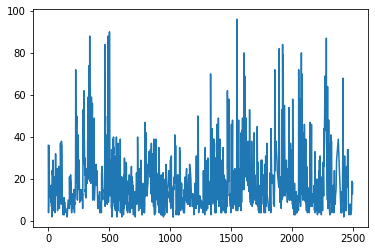

In [668]:
from matplotlib import pyplot as plt
plt.plot(sentence_index, sentence_token_count)

In [669]:
max_count = 0
for tokenSet in sinhala_tokens_set:
    if(len(tokenSet) > max_count):
        max_count = len(tokenSet)
print("Maximum token count before removing stop words:", max_count)

Maximum token count before removing stop words: 96


In [670]:
min_count = 2147483647
for tokenSet in sinhala_tokens_set:
    if(len(tokenSet) < min_count):
        min_count = len(tokenSet)
print("Minimum token count before removing stop words:", min_count)

Minimum token count before removing stop words: 2


In [671]:
max_count = 0
for tokenSet in no_stop_sinhala_set:
    if(len(tokenSet) > max_count):
        max_count = len(tokenSet)
print("Maximum token count after removing stop words:", max_count)

Maximum token count after removing stop words: 86


In [672]:
min_count = 2147483647
for tokenSet in no_stop_sinhala_set:
    if(len(tokenSet) < min_count):
        min_count = len(tokenSet)
print("Minimum token count after removing stop words:", min_count)

Minimum token count after removing stop words: 1


In [673]:
def constructSent(lst):
    return " ".join(lst)
no_stop_sent = []
for lst in no_stop_sinhala_set:
    no_stop_sent.append(constructSent(lst))

In [674]:
no_stop_sent

['බැල්ලි කොටින්ගේ ගු කනකොට අපහසුවක් දැනුනෙ දන් ඔකිට මිනිහා මැරුනම දැනුන දුකට දහස් ගුනයක දුකක් දැනෙනවා ඉස්සරහට උපසම්පදාව තියන භික්සුවක් හිරේ යැවුවට ඔකි වැඩියෙන්ම ආදරේ කෙනෙක් ඔකිට නැති වෙනවා වැඩි කල් නොගිහින්',
 'මන් ඊයේ මුස්ලිම් ඩෑල් එකක් සෙල්ෆියක් ගත්තා සහජීවනේ රැකගෙන යන්න ඌ ඒක තාම දාලා පරයා',
 'සංහිදියාවට අවුලක් වෙයි',
 'කටින් පුරසාරම් දොඩන අපි සිංහලයො විදියට ලැජ්ජා විය යුතුයි',
 'මචන් මගුල නවත්තලා කොන්දක් තියෙනවානම් පුලුවන්නම් කරලා පෙන්නපන් දෙසපාලනය කරන අයගෙන් මෙ රටට වෙලාතියෙන්නෙ කියලා එදාට උබ නියම කොල්ලෙක් පුලුවන්නම් කරලා පෙන්නනවාද',
 'ආණ්ඩුවේ නෙවෙයි රට හූරාගෙන තමන්ගෙ බූදලය කියල හිතාගෙන රට උගස් තියල සල්ලි නයට අරගෙන තමතමන්ගෙ පරම්පරාවෙ එවුන්ටයි හිතවත් එවුන්ටයි බෙදාගෙන කන සියලුම දේශපාලකයන් දුටු දුටු තැන මරලා දාන දිනය වැඩි ඈතක',
 'ලංකාව මෙිකෙ ඉන්නෙ වාහනයක් ගත්තම අලි ඔලුවෙන් ඉන්න පාරෙ යන එකෙක් හිතන්නැති නිරැවත් පිංපියො වගෙ එවුන් ටිකක් නෙ',
 'උඹ ලෝකයක් හදාගත්ත නම්බුව ලංකාවේ කාලකණ්ණි එක විනාඩියේන් නැති කරයි බන් හන්ද දේශපාලනය කරන්ට එන්ට මචංංංංං ගුඩ්ලක්',
 'පල්ලියකට ගලක් වැදුනත් පරසක්වල ගහන 

In [675]:
sinhala_df["cleaned_phrase"] = no_stop_sent

In [676]:
sinhala_df

,PhraseNo,Phrase,IsHateSpeech,cleaned_phrase
0,1,මේ බැල්ලි කොටින්ගේ ගු කනකොට අපහසුවක් දැනුනෙ නැ...,YES,බැල්ලි කොටින්ගේ ගු කනකොට අපහසුවක් දැනුනෙ දන් ඔ...
1,2,මන් ඊයේ මුස්ලිම් ඩෑල් එකක් එක්ක සෙල්ෆියක් ගත්ත...,YES,මන් ඊයේ මුස්ලිම් ඩෑල් එකක් සෙල්ෆියක් ගත්තා සහජ...
2,3,සංහිදියාවට අවුලක් වෙයි ද,NO,සංහිදියාවට අවුලක් වෙයි
3,4,.කටින් පුරසාරම් දොඩන අපි සිංහලයො විදියට ලැජ්ජා...,YES,කටින් පුරසාරම් දොඩන අපි සිංහලයො විදියට ලැජ්ජා ...
4,5,මචන් ඔය මගුල නවත්තලා කොන්දක් තියෙනවානම් පුලුවන...,YES,මචන් මගුල නවත්තලා කොන්දක් තියෙනවානම් පුලුවන්නම...
...,...,...,...,...
2488,2489,ශ්‍රී ලාංකික දේශය සුන්දර කරමු,NO,ශ්‍රී ලාංකික දේශය සුන්දර කරමු
2489,2490,ඕක කලින් අපි නොදන්න ලයිවු එකේ ගිය එකක්.....,NO,ඕක කලින් අපි නොදන්න ලයිවු එකේ ගිය එකක්
2493,2494,ඒත් එහෙම කියන්න එපා මට තේරැනා පැසී අපහසුතාවයට ...,NO,එහෙම කියන්න මට තේරැනා පැසී අපහසුතාවයට පත්වුනා ...
2496,2497,කවුරු මොනා කිව්වත්.... ඔයාල දෙන්නගෙ කටවල් දෙකට...,NO,මොනා කිව්වත් ඔයාල දෙන්නගෙ කටවල් දෙකට ගහන්න ලංක...


- After removing the stopwords the total number of tokens have reduces
- After removing the stopwords the total number of unique tokens have reduces
- After removing the stopwords the maximum sentence length has reduced
- After removing the stopwords the minimum sentence length has reduced

### Answer (c)

Any pre-text explaining the code below...

In [677]:
# bag of words
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
sinhala_bag_of_words_X = vectorizer.fit_transform(list(sinhala_df["cleaned_phrase"]))
singlish_bag_of_words_X = vectorizer.fit_transform(list(singlish_df["cleaned_phrase"]))

In [678]:
sinhala_bag_of_words_y = list(sinhala_df.IsHateSpeech)
singlish_bag_of_words_y = list(singlish_df.IsHateSpeech)

In [679]:
# encoding labels
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
sinhala_bag_of_words_y = le.fit_transform(sinhala_bag_of_words_y)
singlish_bag_of_words_y = le.fit_transform(singlish_bag_of_words_y)

In [680]:
# train test split
from sklearn.model_selection import train_test_split

# sinhala dataset
X_train_sinhala, X_test_sinhala, y_train_sinhala, y_test_sinhala = train_test_split(sinhala_bag_of_words_X, sinhala_bag_of_words_y, test_size=0.2, random_state=42)

In [681]:
# singlish dataset
X_train_singlish, X_test_singlish, y_train_singlish, y_test_singlish = train_test_split(singlish_bag_of_words_X, singlish_bag_of_words_y, test_size=0.2, random_state=42)

In [682]:
# Logistic Regression Model for sinhala
from sklearn.linear_model import LogisticRegression
logreg_sinhala = LogisticRegression()
logreg_sinhala.fit(X_train_sinhala, y_train_sinhala)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [683]:
sinhala_prediction = logreg_sinhala.predict(X_test_sinhala)

In [684]:
print("Accuracy for sinhala dataset:", logreg_sinhala.score(X_test_sinhala, y_test_sinhala))

Accuracy for sinhala dataset: 0.7


In [685]:
# precision, recall and fscore
from sklearn.metrics import precision_recall_fscore_support
p, r, f, s =  precision_recall_fscore_support(y_test_sinhala, sinhala_prediction, average='macro')
print("Precision for sinhala dataset:", p)
print("Recall for sinhala dataset:", r)
print("F score for sinhala dataset:", f)

Precision for sinhala dataset: 0.7070707070707071
Recall for sinhala dataset: 0.695340416408595
F score for sinhala dataset: 0.6938812652422379


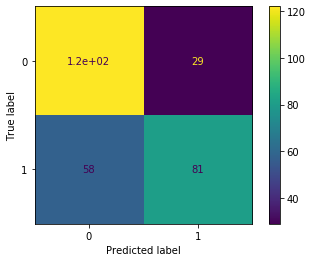

In [686]:
# confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg_sinhala, X_test_sinhala, y_test_sinhala)

In [687]:
# Logistic Regression Model for singlish
from sklearn.linear_model import LogisticRegression
logreg_singlish = LogisticRegression()
logreg_singlish.fit(X_train_singlish, y_train_singlish)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [688]:
singlish_prediction = logreg_singlish.predict(X_test_singlish)

In [689]:
print("Accuracy for singlish dataset:", logreg_singlish.score(X_test_singlish, y_test_singlish))

Accuracy for singlish dataset: 0.6428571428571429


In [690]:
p, r, f, s =  precision_recall_fscore_support(y_test_singlish, singlish_prediction, average='macro')
print("Precision for singlish dataset:", p)
print("Recall for singlish dataset:", r)
print("F score for singlish dataset:", f)

Precision for singlish dataset: 0.6360544217687074
Recall for singlish dataset: 0.6166666666666667
F score for singlish dataset: 0.6144525225820665


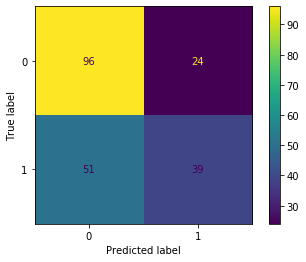

In [691]:
# confusion matrix
plot_confusion_matrix(logreg_singlish, X_test_singlish, y_test_singlish)

In [594]:
# find the most important tokens

Any post-text explaining the result obtained...

### Answer (d)

Any pre-text explaining the code below...

In [735]:
# merge 2 datasets
sets = [singlish_df, sinhala_df]
data = pd.concat(sets)

In [736]:
from sklearn.utils import shuffle
data = shuffle(data)
data

,PhraseNo,Phrase,IsHateSpeech,cleaned_phrase
598,599,නුවර කොල්ලෝ ඉන්නවනම් මටත් සපෝට් එකක් ඕනි...ලොක...,NO,නුවර කොල්ලෝ ඉන්නවනම් මටත් සපෝට් එකක් ඕනි ලොකු ...
17,18,රට හදන්න ඕනේ නම් එන්ජීඕ ගැට වලින් මිදී ගෙදරට ව...,YES,රට හදන්න ඕනේ එන්ජීඕ ගැට වලින් මිදී ගෙදරට වී ඉන්න
2333,2334,එකි අරුට කියලා ඇරගේන දැන් එනවා so so kiyann .අ...,YES,එකි අරුට කියලා ඇරගේන දැන් එනවා so so kiyann අ...
1752,1753,උන්ට පිස්සු නෑ .... ඔවා බලන් ඉන්න අපිට පිස්සු ...,YES,උන්ට පිස්සු ඔවා බලන් ඉන්න අපිට පිස්සු ඇමැති වර...
488,489,හසිනි හරි දෙයක් කිවුවා මොනා උනත් . හසිනිව සැක ...,YES,හසිනි දෙයක් කිවුවා මොනා උනත් හසිනිව සැක කරන්න ...
...,...,...,...,...
2456,2457,කරුනාකර මේ වගේ හිඟන මානසිකත්වයක් තිබෙන උන් වෙන...,NO,කරුනාකර හිඟන මානසිකත්වයක් තිබෙන උන් කතා නොකර ස...
660,661,like anek ratawala ehema unath lankawe ehema w...,NO,like anek ratawala ehema unath lankawe ehema w...
1801,1802,mun hari asawen inne adagahapu gaman sari gala...,YES,mun hari asawen inne adagahapu gaman sari gala...
979,980,"සුදු ඇදගෙන අන්තිමට එන කෙනාව බලන්න, මෙක තනිකර බ...",NO,සුදු ඇදගෙන අන්තිමට එන කෙනාව බලන්න මෙක තනිකර බො...


In [737]:
X = data.cleaned_phrase
y = data.IsHateSpeech

In [738]:
X = vectorizer.fit_transform(list(X))
y = le.fit_transform(list(y))

In [739]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [740]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [741]:
model_prediction = model.predict(X_test)

In [742]:
print("Model accuracy:", model.score(X_test, y_test))

Model accuracy: 0.69


In [743]:
p, r, f, s =  precision_recall_fscore_support(y_test, model_prediction, average='macro')
print("Precision:", p)
print("Recall:", r)
print("F score:", f)

Precision: 0.7083206494165398
Recall: 0.6663263983407868
F score: 0.6623843938819696


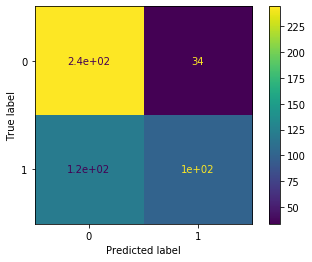

In [744]:
# confusion matrix
plot_confusion_matrix(model, X_test, y_test)

- Having a single dataset has the better accuracy

### Answer (e)

Any pre-text explaining the code below...

In [745]:
# apply tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [746]:
X = list(data.cleaned_phrase)

In [751]:
X = vectorizer.fit_transform(X)

In [752]:
cross_val_model = LogisticRegression()

In [758]:
# cross validation accuracy
from sklearn.model_selection import cross_val_score
cross_val_acc = cross_val_score(cross_val_model, X, y, cv=10)
cross_val_acc

array([0.7  , 0.724, 0.708, 0.704, 0.712, 0.72 , 0.74 , 0.684, 0.672,
       0.692])

In [759]:
print("Average accuracy in cross validation:", sum(cross_val_acc)/len(cross_val_acc))

Average accuracy in cross validation: 0.7055999999999999


In [763]:
cross_val_precision = cross_val_score(cross_val_model, X, y, cv=10, scoring="precision")
cross_val_precision

array([0.74647887, 0.75308642, 0.80327869, 0.75714286, 0.76388889,
       0.75      , 0.82608696, 0.72857143, 0.75438596, 0.70731707])

In [764]:
print("Average precision in cross validation:", sum(cross_val_precision)/len(cross_val_precision))

Average precision in cross validation: 0.759023715072504


Any post-text explaining the result obtained...

### Answer (f)

Any pre-text explaining the code below...

In [6]:
# Insert code for part (f)

Any post-text explaining the result obtained...

### Answer (g)

Insert text description for this part here